In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd


In [2]:
#import data
train_data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\egis_traindata.csv")
train_data.head()

,Unnamed: 0,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,0,174,111,121,98,76,0,0,0.747411,0.740759,39,12.664070,Kartoffel,Kartoffel_1
1,1,97,65,109,84,50,0,0,0.785250,0.812063,18,7.130874,Kartoffel,Kartoffel_2
2,2,139,124,144,118,84,0,0,0.826178,0.791622,36,5.622304,Kartoffel,Kartoffel_3
3,3,90,61,108,80,44,0,0,0.782149,0.816098,14,10.524947,Kartoffel,Kartoffel_4
4,4,73,50,110,83,46,0,0,0.764247,0.810826,11,6.394969,Kartoffel,Kartoffel_5


In [3]:
train_data=train_data.drop(columns=["Unnamed: 0","green pixels"])


train_data.loc[train_data["Label"]=="Karotte","Label"]=0
train_data.loc[train_data["Label"]=="Kartoffel","Label"]=1
train_data.loc[train_data["Label"]=="Zwiebel","Label"]=2
train_data.loc[train_data["Label"]=="Karotte_Trieb","Label"]=3
train_data.loc[train_data["Label"]=="Kartoffel_Trieb","Label"]=4
train_data.loc[train_data["Label"]=="Zwiebel_Trieb","Label"]=5

train_data["Label"]=train_data["Label"].astype("int")
train_data.head()

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,174,111,121,98,76,0,0.747411,0.740759,39,12.664070,1,Kartoffel_1
1,97,65,109,84,50,0,0.785250,0.812063,18,7.130874,1,Kartoffel_2
2,139,124,144,118,84,0,0.826178,0.791622,36,5.622304,1,Kartoffel_3
3,90,61,108,80,44,0,0.782149,0.816098,14,10.524947,1,Kartoffel_4
4,73,50,110,83,46,0,0.764247,0.810826,11,6.394969,1,Kartoffel_5


In [4]:
X_train=train_data.iloc[:,0:10]

y_train=train_data.iloc[:,10]

In [5]:
#import data
test_data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\TESTDATA_vegis_testdata.csv")
test_data.head()

,Unnamed: 0,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,0,174,76,101,71,36,0,0,0.737560,0.641460,24,8.030712,Kartoffel,Kartoffel_1
1,1,165,94,120,102,78,0,2,0.000000,0.740219,43,6.675791,Kartoffel,Kartoffel_2
2,2,177,99,107,88,64,0,0,0.730839,0.715150,40,4.414075,Kartoffel,Kartoffel_3
3,3,161,74,107,88,64,0,0,0.742698,0.670203,25,6.183902,Kartoffel,Kartoffel_4
4,4,127,87,103,89,72,0,0,0.740022,0.755528,44,6.381831,Kartoffel,Kartoffel_5


In [6]:
test_data=test_data.drop(columns=["Unnamed: 0","green pixels"])


test_data.loc[test_data["Label"]=="Karotte","Label"]=0
test_data.loc[test_data["Label"]=="Kartoffel","Label"]=1
test_data.loc[test_data["Label"]=="Zwiebel","Label"]=2
test_data.loc[test_data["Label"]=="Karotte_Trieb","Label"]=3
test_data.loc[test_data["Label"]=="Kartoffel_Trieb","Label"]=4
test_data.loc[test_data["Label"]=="Zwiebel_Trieb","Label"]=5

test_data["Label"]=test_data["Label"].astype("int")
test_data.head()

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,174,76,101,71,36,0,0.737560,0.641460,24,8.030712,1,Kartoffel_1
1,165,94,120,102,78,2,0.000000,0.740219,43,6.675791,1,Kartoffel_2
2,177,99,107,88,64,0,0.730839,0.715150,40,4.414075,1,Kartoffel_3
3,161,74,107,88,64,0,0.742698,0.670203,25,6.183902,1,Kartoffel_4
4,127,87,103,89,72,0,0.740022,0.755528,44,6.381831,1,Kartoffel_5


In [7]:
X_test=test_data.iloc[:,0:10]

y_test=test_data.iloc[:,10]

In [44]:
knn=KNeighborsClassifier(n_neighbors=3,algorithm="brute", )
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [45]:
y_test_pred=knn.predict(X_test)
y_train_pred=knn.predict(X_train)
accuracy_testdata = accuracy_score(y_test, y_test_pred)
accuracy_traindata = accuracy_score(y_train, y_train_pred)
score=knn.score(X_train,y_train)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

Accuracy Test: 0.7751479289940828
Accuracy Train: 0.9050070191857744


Text(0.5, 1.0, 'Vegis TRAIN  DATA')

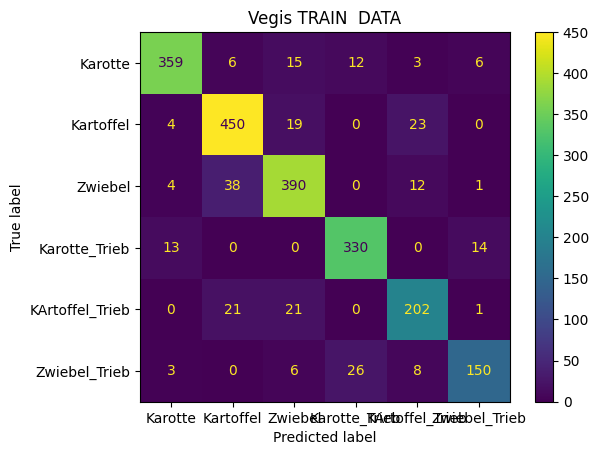

In [10]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn,
    X_train,
    y_train,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

Text(0.5, 1.0, 'Vegis TEST DATA')

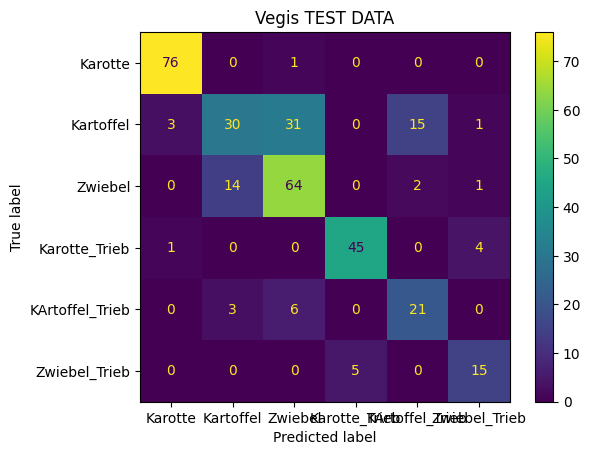

In [11]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test,
    y_test,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TEST DATA")